In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wineRed = pd.read_csv('winequality-red .csv',header = 0,delimiter = ';')

print("wineRed\n\n",wineRed.describe())


wineRed

        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.00000

In [2]:
#Checking for na values in any rows
print("NA's present : ",wineRed.isnull().any().any())

NA's present :  False


In [3]:
#3. Split the data into test and train
#Generate a random list of true and false and assign train and test based on those values
redSplit = np.random.rand(wineRed.shape[0]) < 0.8
#Assign train to true
trainRed = wineRed[redSplit]
#Assign test to false
testRed = wineRed[~redSplit]

print("Red Wine\n")
print("Train shape : ",trainRed.shape,"\nTest shape : ",testRed.shape)

#RedWine
xTrain = trainRed.loc[:,trainRed.columns != 'quality']
yTrain = trainRed.loc[:,trainRed.columns == 'quality']
xTest = testRed.loc[:,testRed.columns != 'quality']
yTest = testRed.loc[:,testRed.columns == 'quality']

Red Wine

Train shape :  (1229, 12) 
Test shape :  (370, 12)


#Normalizing the data
for each in xTrain.columns.values:
    xTrain[each] = (xTrain[each] - xTrain[each].min())/(xTrain[each].max()-xTrain[each].min())
    
for each in xTest.columns.values:
    xTest[each] = (xTest[each] - xTest[each].min())/(xTest[each].max()-xTest[each].min())

In [4]:
#Adding y data to train dataset, to avoid mismatch during shuffling
train = xTrain.copy()
train['quality'] = yTrain
#print(train)

In [5]:
#Shuffling the data each time mini-batch is called and splitting into respective train ans test data
def shuffleAndSplit(trainS,splits):
    trainS.sample(frac=1)
    batch = np.array_split(trainS, splits)
    return(batch)

In [6]:
#Loss function
def loss(x,y,beta,r1,r2):
    yPredicted = np.array(x.dot(beta))
    l2 = 2*r1*((beta.T.dot(beta)).sum())
    l1 = r2*(np.abs(beta).sum())
    leastSquareLoss = (np.square(y-yPredicted)).sum()
    return(leastSquareLoss+l1+l2)

In [7]:
#Splitting data to trian and test
def trainSplit(trainSp):
    x = trainSp.loc[:,trainSp.columns != 'quality']
    #x = np.column_stack([x,np.ones(len(x))])
    y = trainSp.loc[:,trainSp.columns == 'quality']
    return(x,y)

In [8]:
#gradient
def gradient(x,y,beta,r1,r2):
    loss = 2 *(x.T.dot(y - np.matmul(x,beta)))
    l2 = 2*r1*beta
    l1 = (r2)
    #print("gradient",r1+r2)
    return(loss+l1+l2)

In [9]:
#Mini batch Gradient Descent
def mini_BGD(trainGd,beta,xTest,yTest,alpha,r1,r2,batchsize,epoch):
    #beta = np.random.rand(trainGd.shape[1]-1,1)
    rmse,ii,rmseTest = [],[],[]
    #loop for epochs
    for each in range(epoch):
        minibatch = shuffleAndSplit(trainGd,int(trainGd.shape[0]/batchsize))
        #Loop for batches
        for every in minibatch:
            x,y = trainSplit(every)
            lossOld = loss(x,y,beta,r1,r2)
            betaNew = beta - alpha*-gradient(x,y,beta,r1,r2)
            lossNew = loss(x,y,betaNew,r1,r2)
            #alpha = boldDriver(alpha,lossOld,lossNew)
            if float(lossOld-lossNew) < 0.00001:
                #print("Optimal beta found : \n",betaNew)
                break
            if each == epoch :
                print("Did not converge")
            beta = betaNew
            #print(lossOld-lossNew)
        ii.append(each)
        rmse.append(np.sqrt(lossNew/xTrain.shape[0]))
        temp = loss(xTest,yTest,beta,r1,r2)
        rmseTest.append(np.sqrt(temp/xTest.shape[0]))
    return (ii,rmse,rmseTest)

In [42]:
beta = np.random.rand(train.shape[1]-1,1)

In [43]:
ii_1,rmse_1,rmseTest_1 = mini_BGD(train,beta,xTest,yTest,0.00000001,100,100,50,100)

In [44]:
ii_2,rmse_2,rmseTest_2 = mini_BGD(train,beta,xTest,yTest,0.00000001,1e-50,1e-50,50,100)

In [45]:
ii_3,rmse_3,rmseTest_3 = mini_BGD(train,beta,xTest,yTest,0.00000001,100,0,50,100)

In [46]:
ii_4,rmse_4,rmseTest_4 = mini_BGD(train,beta,xTest,yTest,0.00000001,0,100,50,100)

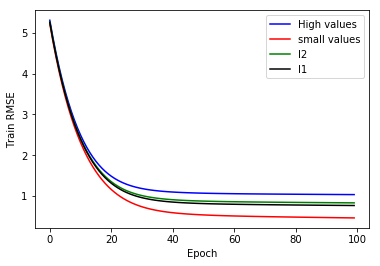

In [47]:
plt.plot(ii_1,rmse_1,color = 'b',label = 'High values')
plt.plot(ii_2,rmse_2,color = 'r',label = 'small values')
plt.plot(ii_3,rmse_3,color = 'g',label = 'l2')
#plt.show()
plt.plot(ii_4,rmse_4,color = 'black',label = 'l1')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Train RMSE')
plt.show()

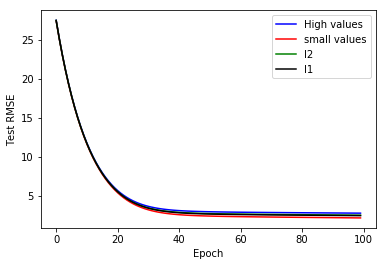

In [48]:
plt.plot(ii_1,rmseTest_1,color = 'b',label = 'High values')
plt.plot(ii_2,rmseTest_2,color = 'r',label = 'small values')
plt.plot(ii_3,rmseTest_3,color = 'g',label = 'l2')
plt.plot(ii_4,rmseTest_4,color = 'black',label = 'l1')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Test RMSE')
plt.show()

Hyper-parameter tuning and Cross validation

In [17]:
#defining grid values for alpha and lambda
#alphaGrid = np.arange(0.0001, 0.0004, 0.0002)
#l2 = np.arange(0.1,0.3,0.1)
#l1 = np.arange(0.1,0.3,0.1)

alphaGrid = np.arange(0.0001, 0.0021, 0.0002)
l2 = np.arange(0.1,1,0.1)
l1 = np.arange(0.1,1,0.1)
print("Alpha Grid : ",alphaGrid)
print("\n\nL1 : ",l1)
print("\n\nL2 : ",l2)

Alpha Grid :  [ 0.0001  0.0003  0.0005  0.0007  0.0009  0.0011  0.0013  0.0015  0.0017
  0.0019]


L1 :  [ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


L2 :  [ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


In [18]:
#returns the test and train data for each fold of cross validation
def cvTestTrain(trainA,testFold,totalFolds):
    trainCv = pd.DataFrame([])
    testCv = pd.DataFrame([])
    #Extracting column names
    cols = trainA.columns.values
    #Removing colunm names
    trainA.columns = [''] * len(trainA.columns)
    #Data split to folds
    batch = np.array_split(trainA,totalFolds)
    key = 1
    trainDict = {}
    #Creating the test fold
    for each in batch:
        trainDict[key] = each
        key = key + 1
    testCv = trainDict[testFold]
    testCv.columns = cols
    #Creating train fold
    for key in range(1,6):
        if(key != testFold):
            trainCv = trainCv.append(trainDict[key])
    #Adding the column names to merged train datset
    trainCv.columns = cols
    return(trainCv,testCv)

In [21]:
#CrossValidation
def cv(trainCvalid,alphaGrid,l1,l2,totalFolds,batchsize,epoch):
    alpha,l1List,l2List,rmseCv = [],[],[],[]
    for eachAlpha in alphaGrid:
        for eachL1 in l1:
            for eachL2 in l2:
                alpha.append(eachAlpha)
                l1List.append(eachL1)
                l2List.append(eachL2)
                eachFoldRmse = []
                for each in range(1,totalFolds+1):
                    trainC = trainCvalid.copy()
                    trainCv,testCv = cvTestTrain(trainC,each,totalFolds)
                    xTest = testRed.loc[:,testCv.columns != 'quality']
                    yTest = testRed.loc[:,testCv.columns == 'quality']
                    ii,rmse,rmseTest = mini_BGD(trainCv,beta,xTest,yTest,eachAlpha,eachL2,eachL1,batchsize,epoch)
                    eachFoldRmse.append(np.mean(rmseTest))
                temp = (np.mean(eachFoldRmse))
                rmseCv.append(float(temp))
    return(alpha,l1List,l2List,rmseCv)

In [22]:
alpha1,l11,l21,rmse1 = cv(train,alphaGrid,l1,l2,5,50,100)

In [24]:
#Stroring the alpha, lamda and rmse values in df
result = pd.DataFrame(
    {'alpha': alpha1,
     'l1': l11,
     'l2': l21,
     'rmse':rmse1
    })


In [26]:
#Choosing optimal alpha and lamda with least RMSE
optimal = result.iloc[result['rmse'].idxmin()]
alphaOptimal = optimal['alpha']
l1Optimal = optimal['l1']
l2Optimal = optimal['l2']
print("Optimal alpha : ",alphaOptimal,"\nOptimal l1 : ",l1Optimal,"\nOptimal l2 : ",l2Optimal)

Optimal alpha :  0.0001 
Optimal l1 :  0.1 
Optimal l2 :  0.1
